# Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import Crime Data

In [2]:
filepath = "../AnyConv.com__Crime_Incidents_in_2017.csv"
df = pd.read_csv(filepath, low_memory=False)

df.head()

,"CCN,C,80","REPORT_DAT,C,80","SHIFT,C,80","METHOD,C,80","OFFENSE,C,80","BLOCK,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","ANC,C,80",...,"BLOCK_GROU,C,80","CENSUS_TRA,C,80","VOTING_PRE,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","BID,C,80","START_DATE,C,80","END_DATE,C,80","OBJECTID,N,10,0","OCTO_RECOR,C,80"
0,2111617,2017-02-06T20:11:14.000Z,EVENING,OTHERS,THEFT/OTHER,600 - 669 BLOCK OF MARYLAND AVENUE NE,400212,136281,6,6C,...,008302 1,8302.0,Precinct 84,38.894376,-76.997556,CAPITOL HILL,2017-02-01T11:55:55.000Z,NaN,306952475,02111617-01
1,7093973,2017-06-03T12:54:27.000Z,DAY,OTHERS,THEFT F/AUTO,2900 - 2999 BLOCK OF N STREET NW,394912,137666,2,2E,...,000100 4,100.0,Precinct 5,38.906838,-77.058661,NaN,2017-06-03T11:54:03.000Z,2017-06-03T11:55:05.000Z,306952489,07093973-01
2,17400847,2017-05-25T13:07:34.000Z,DAY,OTHERS,THEFT F/AUTO,4500 - 4599 BLOCK OF BRANDYWINE STREET NW,392231,142425,3,3E,...,001001 3,1001.0,Precinct 31,38.949689,-77.089625,NaN,2017-05-12T23:00:00.000Z,2017-05-13T09:00:00.000Z,306951085,17400847-01
3,17400849,2017-05-25T19:38:01.000Z,EVENING,OTHERS,THEFT/OTHER,2500 - 2599 BLOCK OF 39TH STREET NW,393318,139472,3,3B,...,000702 1,702.0,Precinct 11,38.923096,-77.077056,NaN,2017-05-14T19:10:00.000Z,2017-05-25T19:10:00.000Z,306951086,17400849-01
4,17400850,2017-05-25T20:18:37.000Z,EVENING,OTHERS,THEFT/OTHER,4100 - 4199 BLOCK OF 8TH STREET NW,397977,141500,4,4C,...,002400 3,2400.0,Precinct 45,38.941388,-77.023335,NaN,2017-05-09T08:00:00.000Z,2017-05-09T18:00:00.000Z,306951087,17400850-01


# Overview of Data

In [3]:
df.columns

Index(['CCN,C,80', 'REPORT_DAT,C,80', 'SHIFT,C,80', 'METHOD,C,80',
       'OFFENSE,C,80', 'BLOCK,C,80', 'XBLOCK,N,10,0', 'YBLOCK,N,10,0',
       'WARD,C,80', 'ANC,C,80', 'DISTRICT,C,80', 'PSA,C,80', 'NEIGHBORHO,C,80',
       'BLOCK_GROU,C,80', 'CENSUS_TRA,C,80', 'VOTING_PRE,C,80',
       'LATITUDE,N,24,15', 'LONGITUDE,N,24,15', 'BID,C,80', 'START_DATE,C,80',
       'END_DATE,C,80', 'OBJECTID,N,10,0', 'OCTO_RECOR,C,80'],
      dtype='object')

- 33082 rows total
- following rows are missing data
- DISTRICT,C,80
- PSA,C,80
- NEIGHBORHO,C,80
- BLOCK_GROU,C,80
- CENSUS_TRA,C,80
- BID,C,80
- END_DATE,C,80

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33082 entries, 0 to 33081
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CCN,C,80           33082 non-null  int64  
 1   REPORT_DAT,C,80    33082 non-null  object 
 2   SHIFT,C,80         33082 non-null  object 
 3   METHOD,C,80        33082 non-null  object 
 4   OFFENSE,C,80       33082 non-null  object 
 5   BLOCK,C,80         33082 non-null  object 
 6   XBLOCK,N,10,0      33082 non-null  int64  
 7   YBLOCK,N,10,0      33082 non-null  int64  
 8   WARD,C,80          33082 non-null  int64  
 9   ANC,C,80           33082 non-null  object 
 10  DISTRICT,C,80      33079 non-null  float64
 11  PSA,C,80           33079 non-null  float64
 12  NEIGHBORHO,C,80    32712 non-null  object 
 13  BLOCK_GROU,C,80    32998 non-null  object 
 14  CENSUS_TRA,C,80    32998 non-null  float64
 15  VOTING_PRE,C,80    33082 non-null  object 
 16  LATITUDE,N,24,15   330

In [5]:
df.describe()

,"CCN,C,80","XBLOCK,N,10,0","YBLOCK,N,10,0","WARD,C,80","DISTRICT,C,80","PSA,C,80","CENSUS_TRA,C,80","LATITUDE,N,24,15","LONGITUDE,N,24,15","OBJECTID,N,10,0"
count,3.308200e+04,33082.000000,33082.000000,33082.000000,33079.000000,33079.000000,32998.000000,33082.000000,33082.000000,3.308200e+04
mean,1.712021e+07,399396.652711,137623.379451,4.456139,3.721394,376.871489,6280.434329,38.906463,-77.006963,3.072805e+08
std,1.502723e+05,3150.374167,3358.194998,2.335491,1.909450,190.730891,3124.047266,0.030251,0.036323,6.578455e+04
min,2.111617e+06,390262.000000,127300.000000,1.000000,1.000000,101.000000,100.000000,38.813471,-77.112316,3.069501e+08
25%,1.705836e+07,397302.250000,136093.000000,2.000000,2.000000,207.000000,3600.000000,38.892672,-77.031103,3.072732e+08
50%,1.711666e+07,399074.000000,137579.000000,5.000000,3.000000,308.000000,7100.000000,38.906061,-77.010676,3.072815e+08
75%,1.717467e+07,401342.250000,139586.000000,6.000000,5.000000,507.000000,9000.000000,38.924144,-76.984522,3.073028e+08
max,2.709178e+07,407806.000000,147292.000000,8.000000,7.000000,708.000000,11100.000000,38.993560,-76.910021,3.073348e+08


### Types of Offenses

In [6]:
df['OFFENSE,C,80'].unique()

array(['THEFT/OTHER', 'THEFT F/AUTO', 'ROBBERY',
       'ASSAULT W/DANGEROUS WEAPON', 'MOTOR VEHICLE THEFT', 'BURGLARY',
       'SEX ABUSE', 'HOMICIDE', 'ARSON'], dtype=object)

In [18]:
offense_type = df.groupby(['OFFENSE,C,80']).count()
offense_type = offense_type.drop(columns=['REPORT_DAT,C,80', 'SHIFT,C,80', 'METHOD,C,80', 'BLOCK,C,80', 'XBLOCK,N,10,0',
                           'YBLOCK,N,10,0',       'WARD,C,80', 'ANC,C,80', 'DISTRICT,C,80', 'PSA,C,80', 
                           'NEIGHBORHO,C,80', 'BLOCK_GROU,C,80', 'CENSUS_TRA,C,80', 'VOTING_PRE,C,80',
                           'LATITUDE,N,24,15', 'LONGITUDE,N,24,15', 'BID,C,80', 'START_DATE,C,80',
                           'END_DATE,C,80', 'OBJECTID,N,10,0', 'OCTO_RECOR,C,80'])

offense_type = offense_type.sort_values('CCN,C,80')

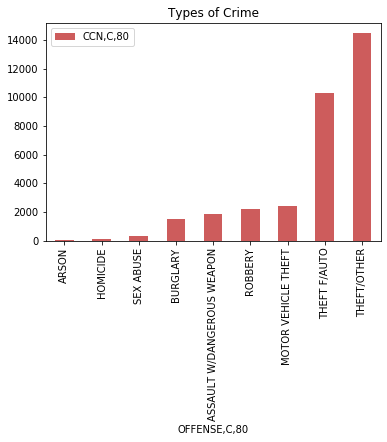

In [19]:
offense_type.plot(kind="bar", color="indianred", title="Types of Crime")
plt.show()